In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("dataset.csv")

# Step 1 
## drop duplicates

In [3]:
df.drop_duplicates(inplace = True)
df.reset_index(inplace = True  , drop = True)

In [4]:
df.shape

(10655, 7)

# Step 2
## drop columns = ['title','undertitle','date','propertydetail']

In [5]:
df.drop(columns = ['title','undertitle','date','propertydetail'],inplace = True)

In [6]:
df.head()

,price,address,key_value
0,For Sale \r...,"Yankin, Yangon","[('Type', 'Condo'), ('Area', '1045 ft<sup>2</s..."
1,For Sale \r...,"Okkalappa South, Yangon","[('Type', 'Apartment'), ('Floor', '3'), ('Area..."
2,For Sale \r...,"Dagon Myothit (North), Yangon","[('Type', 'House'), ('Floor', '2.5'), ('Area',..."
3,For Sale \r...,"Yankin, Yangon","[('Type', 'Land'), ('Area', ""105' x 50'""), ('O..."
4,For Sale \r...,"Dagon Myothit (North), Yangon","[('Type', 'House'), ('Floor', '3'), ('Area', ""..."


# Step 3
## cleaning price column

In [7]:
# (i) deleteing punctions and trash
# df['price'] = df['price'].str.split("\r").str[-1].str.strip().str.split("L").str[0].str.replace(",",'').str.strip()

In [8]:
# df['price'] = df['price'].str.split("\r").str[-1].str.strip().str.split("L").str[0].str.replace(",","").str.strip()

In [9]:
df['price'] = df['price'].str.replace(r"[^0-9.]",'',regex = True)

In [10]:
df['price'] = df['price'].apply(lambda x:x if len(str(x))!= 0 else np.nan).astype(float)

In [11]:
df['price'].dtype

dtype('float64')

In [12]:
df.head()

,price,address,key_value
0,8200.0,"Yankin, Yangon","[('Type', 'Condo'), ('Area', '1045 ft<sup>2</s..."
1,2990.0,"Okkalappa South, Yangon","[('Type', 'Apartment'), ('Floor', '3'), ('Area..."
2,11700.0,"Dagon Myothit (North), Yangon","[('Type', 'House'), ('Floor', '2.5'), ('Area',..."
3,90000.0,"Yankin, Yangon","[('Type', 'Land'), ('Area', ""105' x 50'""), ('O..."
4,9800.0,"Dagon Myothit (North), Yangon","[('Type', 'House'), ('Floor', '3'), ('Area', ""..."


# Step 4
## Extracting address

In [13]:
df['state'] = df['address'].str.split(",").str[-1].str.strip().str.lower()

In [14]:
df['city'] = df['address'].str.split(",").str[0].str.strip().str.lower()

In [15]:
df.shape

(10655, 5)

In [16]:
df = df[df['state'] =='yangon']
df.reset_index(drop = True , inplace = True)

In [17]:
df.drop(columns = ['address'] , inplace = True)

In [18]:
df.head()

,price,key_value,state,city
0,8200.0,"[('Type', 'Condo'), ('Area', '1045 ft<sup>2</s...",yangon,yankin
1,2990.0,"[('Type', 'Apartment'), ('Floor', '3'), ('Area...",yangon,okkalappa south
2,11700.0,"[('Type', 'House'), ('Floor', '2.5'), ('Area',...",yangon,dagon myothit (north)
3,90000.0,"[('Type', 'Land'), ('Area', ""105' x 50'""), ('O...",yangon,yankin
4,9800.0,"[('Type', 'House'), ('Floor', '3'), ('Area', ""...",yangon,dagon myothit (north)


In [19]:
df.shape

(10636, 4)

# Step 5
## converting key_value to Dataframe

In [20]:
df['key_value'] = df['key_value'].str.replace("[","").str.replace("]","")

In [21]:
df['key_value']

0        ('Type', 'Condo'), ('Area', '1045 ft<sup>2</su...
1        ('Type', 'Apartment'), ('Floor', '3'), ('Area'...
2        ('Type', 'House'), ('Floor', '2.5'), ('Area', ...
3        ('Type', 'Land'), ('Area', "105' x 50'"), ('Ow...
4        ('Type', 'House'), ('Floor', '3'), ('Area', "6...
                               ...                        
10631    ('Type', 'House'), ('Floor', '3 RC'), ('Area',...
10632    ('Type', 'House'), ('Floor', '2RC'), ('Area', ...
10633    ('Type', 'House'), ('Floor', '2BN'), ('Area', ...
10634    ('Type', 'House'), ('Floor', '3.5 RC'), ('Area...
10635    ('Type', 'House'), ('Floor', '2RC'), ('Area', ...
Name: key_value, Length: 10636, dtype: object

In [22]:
data = []

for i in df['key_value'].str.split("),",regex = False):
    key = []
    value =[]
    for j in i:
        k = j.split(",")[0].replace("('",'').replace("'",'').strip()
        val = j.split(",")[1].replace("'",'').replace('"','').strip()
        key.append(k)
        value.append(val)
    data.append(dict(zip(key,value)))
key_value_df = pd.DataFrame(data)
    
        
key_value_df_back = key_value_df.copy()

In [23]:
key_value_df.reset_index(inplace = True , drop = True)

In [24]:
key_value_df.shape

(10636, 14)

In [25]:
df.shape

(10636, 4)

In [26]:
df.tail(3)

,price,key_value,state,city
10633,16500.0,"('Type', 'House'), ('Floor', '2BN'), ('Area', ...",yangon,mayangone
10634,118000.0,"('Type', 'House'), ('Floor', '3.5 RC'), ('Area...",yangon,bahan
10635,30000.0,"('Type', 'House'), ('Floor', '2RC'), ('Area', ...",yangon,thingangkuun


In [27]:
key_value_df.tail(3)

,Type,Area,Bed Room,Bath Room,Ownership,Furnishing Type,Floor,Phone,Availability Date,Aircon conditioner details,Room Partition Type,Flooring Type,Water System Type,Nearby Amenities
10633,House,70 x 80,NaN,NaN,Contract,Fully Furnished),2BN,NaN,ready to use,-,NaN,NaN,Groundwater pumping,NaN
10634,House,7925 ft<sup>2</sup>,7,7,Grant,Fully Furnished,3.5 RC,NaN,ready to use,-,Master and Single Bedroom),Parquet Flooring,Groundwater pumping,NaN
10635,House,40 x 70,6,4,Grant,Fully Furnished,2RC,NaN,ready to use,NaN,Master and Single Bedroom),Parquet Flooring,Groundwater pumping,NaN


In [28]:
key_value_df.head()

,Type,Area,Bed Room,Bath Room,Ownership,Furnishing Type,Floor,Phone,Availability Date,Aircon conditioner details,Room Partition Type,Flooring Type,Water System Type,Nearby Amenities
0,Condo,1045 ft<sup>2</sup>,2,2,,Fully Furnished),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Apartment,54 x 18,2,1,,Fully Furnished),3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,House,60 x 20,4,4,,Fully Furnished),2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Land,105 x 50,NaN,NaN,),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,House,60 x 22,5,7,),NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Step 6
## Select columns from key_value_df ['Type','Area','Bed Room','Bath Room','Floor']

In [29]:
key_value_df.head(2)

,Type,Area,Bed Room,Bath Room,Ownership,Furnishing Type,Floor,Phone,Availability Date,Aircon conditioner details,Room Partition Type,Flooring Type,Water System Type,Nearby Amenities
0,Condo,1045 ft<sup>2</sup>,2,2,,Fully Furnished),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Apartment,54 x 18,2,1,,Fully Furnished),3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# key_value_df.drop(columns = ['Ownership','Furnishing Type','Phone',
#                              'Availability Date','Aircon conditioner details',
#                             'Room Partition Type',
#                             'Flooring Type',])

In [31]:
df.tail(5)

,price,key_value,state,city
10631,42000.0,"('Type', 'House'), ('Floor', '3 RC'), ('Area',...",yangon,thingangkuun
10632,32000.0,"('Type', 'House'), ('Floor', '2RC'), ('Area', ...",yangon,thingangkuun
10633,16500.0,"('Type', 'House'), ('Floor', '2BN'), ('Area', ...",yangon,mayangone
10634,118000.0,"('Type', 'House'), ('Floor', '3.5 RC'), ('Area...",yangon,bahan
10635,30000.0,"('Type', 'House'), ('Floor', '2RC'), ('Area', ...",yangon,thingangkuun


In [32]:
key_value_df.tail(5)

,Type,Area,Bed Room,Bath Room,Ownership,Furnishing Type,Floor,Phone,Availability Date,Aircon conditioner details,Room Partition Type,Flooring Type,Water System Type,Nearby Amenities
10631,House,6400 ft<sup>2</sup>,7,7,Grant,Fully Furnished,3 RC,NaN,ready to use,NaN,Master Bedroom Only),Parquet Flooring,Groundwater pumping,NaN
10632,House,70 x 90,7,4,Grant,Fully Furnished,2RC,NaN,ready to use,14,Master and Single Bedroom),Parquet Flooring,Groundwater pumping,NaN
10633,House,70 x 80,NaN,NaN,Contract,Fully Furnished),2BN,NaN,ready to use,-,NaN,NaN,Groundwater pumping,NaN
10634,House,7925 ft<sup>2</sup>,7,7,Grant,Fully Furnished,3.5 RC,NaN,ready to use,-,Master and Single Bedroom),Parquet Flooring,Groundwater pumping,NaN
10635,House,40 x 70,6,4,Grant,Fully Furnished,2RC,NaN,ready to use,NaN,Master and Single Bedroom),Parquet Flooring,Groundwater pumping,NaN


In [33]:
key_value_df = key_value_df[['Type','Area','Bed Room','Bath Room','Floor']]
key_value_df.tail(5)

,Type,Area,Bed Room,Bath Room,Floor
10631,House,6400 ft<sup>2</sup>,7,7,3 RC
10632,House,70 x 90,7,4,2RC
10633,House,70 x 80,NaN,NaN,2BN
10634,House,7925 ft<sup>2</sup>,7,7,3.5 RC
10635,House,40 x 70,6,4,2RC


# Step 7
## Select Only ['Apartment','House','Condo'] from Type Variable

In [34]:
key_value_df['Type'].value_counts()

Type
Apartment          3349
House              2865
Condo              2678
Land               1653
Industrial Zone      53
Office / Retail      38
Name: count, dtype: int64

In [35]:
key_value_df.shape

(10636, 5)

In [36]:
key_value_df = key_value_df[key_value_df['Type'].isin(['Apartment','House','Condo'])]

In [37]:
key_value_df.shape

(8892, 5)

In [38]:
key_value_df.head()

,Type,Area,Bed Room,Bath Room,Floor
0,Condo,1045 ft<sup>2</sup>,2,2,NaN
1,Apartment,54 x 18,2,1,3
2,House,60 x 20,4,4,2.5
4,House,60 x 22,5,7,3
5,House,60 x 70,4,3,NaN


# Step 8
## Cleaning Area Column

In [39]:
# Foot square_1 from foot square
key_value_df['ft_square_1'] = key_value_df['Area'].apply(lambda x:x if 'ft<sup>2</sup>' in str(x) else str(0))
key_value_df['ft_square_1'] = key_value_df['ft_square_1'].str.replace("ft<sup>2</sup>","").astype(float)

In [40]:
# Foot square_2 from x_and_y
key_value_df['area_x_y'] = key_value_df['Area'].apply(lambda x:x if 'x' in str(x) else str(0))
x = key_value_df['area_x_y'].str.split("x").str[0].astype(float)
y = key_value_df['area_x_y'].str.split("x").str[-1].astype(float)
key_value_df['ft_square_2'] = x*y

In [41]:
# Foot square_3 from acre
# 1 acre = 43560 foot square
key_value_df['acre'] = key_value_df['Area'].apply(lambda x :x if "acre" in str(x) else str(0))
key_value_df['acre'] = key_value_df['acre'].str.replace("acre","").astype(float)
key_value_df['ft_square_3'] = key_value_df['acre'] * 43560

In [42]:
# Adding at one column the Foot square
key_value_df["ft_square"] = key_value_df['ft_square_1'] + key_value_df['ft_square_2'] + key_value_df['ft_square_3'].isnull().sum()

In [43]:
key_value_df.head()

,Type,Area,Bed Room,Bath Room,Floor,ft_square_1,area_x_y,ft_square_2,acre,ft_square_3,ft_square
0,Condo,1045 ft<sup>2</sup>,2,2,NaN,1045.0,0,0.0,0.0,0.0,1045.0
1,Apartment,54 x 18,2,1,3,0.0,54 x 18,972.0,0.0,0.0,972.0
2,House,60 x 20,4,4,2.5,0.0,60 x 20,1200.0,0.0,0.0,1200.0
4,House,60 x 22,5,7,3,0.0,60 x 22,1320.0,0.0,0.0,1320.0
5,House,60 x 70,4,3,NaN,0.0,60 x 70,4200.0,0.0,0.0,4200.0


In [44]:
key_value_df.drop(columns = ['Area','area_x_y','acre','ft_square_1','ft_square_2','ft_square_3'] , inplace = True)

In [45]:
key_value_df.shape

(8892, 5)

In [46]:
# removing the the row where ft_square is zero
key_value_df = key_value_df[key_value_df['ft_square'] != 0.0]

In [47]:
key_value_df.shape

(8825, 5)

# Step 9
## Cleaning Bed Room

In [48]:
# converting the data type
key_value_df['Bed Room'] = key_value_df['Bed Room'].astype(float)

# Step 10
## Cleaning Bath Room

In [49]:
# converting the data type 
key_value_df['Bath Room']=key_value_df['Bath Room'].astype(float)

# Step 11
## Cleaning Floor

In [50]:
from floor_transcription import floor_trans

In [51]:
def floor_str_to_int(x):
    key = list(floor_trans.keys())
    value = list(floor_trans.values())
    try:
        if x in key:
            ind = key.index(x)
            floor = value[ind]
            return float(np.round(floor,1))
        elif float(x):
            return x
    except:
        pass
    
    x = str(x).strip()
    if x ==str(np.nan) or x =="":
        return float(np.nan)
        


In [52]:
key_value_df['Floor'] = key_value_df['Floor'].apply(floor_str_to_int).astype(float)

In [53]:
key_value_df['Floor'].isnull().sum()

np.int64(4241)

In [54]:
# key_value_df = key_value_df.dropna()

In [55]:
key_value_df.isnull().sum()

Type            0
Bed Room     4388
Bath Room    3973
Floor        4241
ft_square       0
dtype: int64

In [56]:
key_value_df_back.shape

(10636, 14)

In [57]:
result = pd.concat([df , key_value_df] , axis = 1)

In [58]:
key_value_df

,Type,Bed Room,Bath Room,Floor,ft_square
0,Condo,2.0,2.0,NaN,1045.0
1,Apartment,2.0,1.0,3.0,972.0
2,House,4.0,4.0,2.5,1200.0
4,House,5.0,7.0,3.0,1320.0
5,House,4.0,3.0,NaN,4200.0
...,...,...,...,...,...
10631,House,7.0,7.0,3.0,6400.0
10632,House,7.0,4.0,2.0,6300.0
10633,House,NaN,NaN,2.0,5600.0
10634,House,7.0,7.0,3.5,7925.0


In [59]:
result

,price,key_value,state,city,Type,Bed Room,Bath Room,Floor,ft_square
0,8200.0,"('Type', 'Condo'), ('Area', '1045 ft<sup>2</su...",yangon,yankin,Condo,2.0,2.0,NaN,1045.0
1,2990.0,"('Type', 'Apartment'), ('Floor', '3'), ('Area'...",yangon,okkalappa south,Apartment,2.0,1.0,3.0,972.0
2,11700.0,"('Type', 'House'), ('Floor', '2.5'), ('Area', ...",yangon,dagon myothit (north),House,4.0,4.0,2.5,1200.0
3,90000.0,"('Type', 'Land'), ('Area', ""105' x 50'""), ('Ow...",yangon,yankin,NaN,NaN,NaN,NaN,NaN
4,9800.0,"('Type', 'House'), ('Floor', '3'), ('Area', ""6...",yangon,dagon myothit (north),House,5.0,7.0,3.0,1320.0
...,...,...,...,...,...,...,...,...,...
10631,42000.0,"('Type', 'House'), ('Floor', '3 RC'), ('Area',...",yangon,thingangkuun,House,7.0,7.0,3.0,6400.0
10632,32000.0,"('Type', 'House'), ('Floor', '2RC'), ('Area', ...",yangon,thingangkuun,House,7.0,4.0,2.0,6300.0
10633,16500.0,"('Type', 'House'), ('Floor', '2BN'), ('Area', ...",yangon,mayangone,House,NaN,NaN,2.0,5600.0
10634,118000.0,"('Type', 'House'), ('Floor', '3.5 RC'), ('Area...",yangon,bahan,House,7.0,7.0,3.5,7925.0


In [60]:
result.sample(10)

,price,key_value,state,city,Type,Bed Room,Bath Room,Floor,ft_square
643,2500.0,"('Type', 'Apartment'), ('Area', ""15' x 55'""), ...",yangon,mayangone,Apartment,1.0,1.0,NaN,825.0
3254,1495.0,"('Type', 'Apartment'), ('Floor', '3 Floor'), (...",yangon,thaketa,Apartment,2.0,1.0,3.0,1045.0
5696,1580.0,"('Type', 'Apartment'), ('Floor', '8'), ('Area'...",yangon,sanchaung,Apartment,NaN,NaN,8.0,900.0
2053,3700.0,"('Type', 'Apartment'), ('Floor', 'Ground Floor...",yangon,kyeemyindaing,Apartment,3.0,2.0,0.5,625.0
10078,10500.0,"('Type', 'Condo'), ('Area', '1650 ft<sup>2</su...",yangon,yankin,Condo,3.0,2.0,NaN,1650.0
5363,30000.0,"('Type', 'House'), ('Area', ""40' x 60'""), ('Ow...",yangon,okkalappa south,House,NaN,NaN,NaN,2400.0
826,10600.0,"('Type', 'House'), ('Area', ""21' x 60'""), ('Ow...",yangon,dagon myothit (north),House,NaN,NaN,NaN,1260.0
384,1450.0,"('Type', 'Apartment'), ('Area', ""12.50' x 50'""...",yangon,thingangkuun,Apartment,NaN,1.0,NaN,625.0
7908,23000.0,"('Type', 'Land'), ('Area', ""60' x 55'""), ('Own...",yangon,okkalappa south,NaN,NaN,NaN,NaN,NaN
8738,3550.0,"('Type', 'Condo'), ('Floor', '5F'), ('Area', '...",yangon,okkalappa south,Condo,2.0,2.0,5.0,918.0


In [61]:
# Step 12
# Delete key_value and apply dropna on the whole dataset

In [62]:
result.drop(columns = ['key_value','state'] , inplace = True)

In [63]:
result.dropna(inplace = True)

In [64]:
result.shape

(2183, 7)

In [65]:
# And the save the dataset

In [66]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2183 entries, 1 to 10635
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      2183 non-null   float64
 1   city       2183 non-null   object 
 2   Type       2183 non-null   object 
 3   Bed Room   2183 non-null   float64
 4   Bath Room  2183 non-null   float64
 5   Floor      2183 non-null   float64
 6   ft_square  2183 non-null   float64
dtypes: float64(5), object(2)
memory usage: 136.4+ KB


In [67]:
result['city'].unique()

array(['okkalappa south', 'dagon myothit (north)', 'mayangone', 'yankin',
       'bahan', 'kamaryut', 'hlaing', 'thanlyin', 'mingalartaungnyunt',
       'sanchaung', 'thingangkuun', 'dagon myothit (seikkan)',
       'pazundaung', 'hlaingtharya', 'thaketa', 'ahlon', 'botahtaung',
       'tamwe', 'kyauktada', 'okkalappa north', 'mingaladon', 'insein',
       'pabedan', 'lanmadaw', 'dagon', 'dagon myothit (south)',
       'kyeemyindaing', 'palae myothit', 'dawbon', 'dagon myothit (east)',
       'latha', 'shwepyithar'], dtype=object)

In [68]:
result['Type'].unique()

array(['Apartment', 'House', 'Condo'], dtype=object)

In [69]:
result

,price,city,Type,Bed Room,Bath Room,Floor,ft_square
1,2990.0,okkalappa south,Apartment,2.0,1.0,3.0,972.0
2,11700.0,dagon myothit (north),House,4.0,4.0,2.5,1200.0
4,9800.0,dagon myothit (north),House,5.0,7.0,3.0,1320.0
6,38000.0,mayangone,House,5.0,3.0,2.0,4225.0
11,35000.0,yankin,House,3.0,3.0,2.5,2400.0
...,...,...,...,...,...,...,...
10630,12000.0,hlaing,House,5.0,3.0,3.0,1495.0
10631,42000.0,thingangkuun,House,7.0,7.0,3.0,6400.0
10632,32000.0,thingangkuun,House,7.0,4.0,2.0,6300.0
10634,118000.0,bahan,House,7.0,7.0,3.5,7925.0


In [77]:
result.select_dtypes(exclude='O').columns

Index(['price', 'Bed Room', 'Bath Room', 'Floor', 'ft_square'], dtype='object')

In [79]:
for i in result.select_dtypes(exclude = "O").columns:
    print(f"- {i}")

- price
- Bed Room
- Bath Room
- Floor
- ft_square


In [80]:
import yaml

In [87]:
with open(r"C:\Users\M S I\Desktop\Myanmar_Houses_Price_Prediction\data_schema\schema.yaml",'r') as file:
    yml_file = yaml.safe_load(file)

In [115]:
col = yml_file['full_columns'].sort()

In [117]:
col

In [108]:
lst = list (result.columns)

In [109]:
lst

['price', 'city', 'Type', 'Bed Room', 'Bath Room', 'Floor', 'ft_square']

In [110]:
lst

['price', 'city', 'Type', 'Bed Room', 'Bath Room', 'Floor', 'ft_square']

In [111]:
lst == yml_file['full_columns']

False

In [113]:
yml_file['cat_columns']

['city', 'Type']

# Data Feature Engineering

In [118]:
result['price']

,price,city,Type,Bed Room,Bath Room,Floor,ft_square
1,2990.0,okkalappa south,Apartment,2.0,1.0,3.0,972.0
2,11700.0,dagon myothit (north),House,4.0,4.0,2.5,1200.0
4,9800.0,dagon myothit (north),House,5.0,7.0,3.0,1320.0
6,38000.0,mayangone,House,5.0,3.0,2.0,4225.0
11,35000.0,yankin,House,3.0,3.0,2.5,2400.0
...,...,...,...,...,...,...,...
10630,12000.0,hlaing,House,5.0,3.0,3.0,1495.0
10631,42000.0,thingangkuun,House,7.0,7.0,3.0,6400.0
10632,32000.0,thingangkuun,House,7.0,4.0,2.0,6300.0
10634,118000.0,bahan,House,7.0,7.0,3.5,7925.0


In [144]:
result['city'].value_counts()

city
okkalappa south            354
thingangkuun               244
dagon myothit (north)      218
yankin                     191
mayangone                  170
hlaing                     146
sanchaung                  132
tamwe                      120
thaketa                    118
kamaryut                    74
bahan                       60
ahlon                       54
dagon myothit (south)       32
lanmadaw                    29
thanlyin                    29
dawbon                      25
okkalappa north             24
kyeemyindaing               24
insein                      22
mingalartaungnyunt          19
dagon myothit (east)        16
botahtaung                  16
hlaingtharya                15
dagon myothit (seikkan)     11
pazundaung                  11
dagon                        9
mingaladon                   8
kyauktada                    7
pabedan                      2
palae myothit                1
latha                        1
shwepyithar                  1
Nam

In [122]:
result['Type'].value_counts()

Type
Apartment    764
House        731
Condo        688
Name: count, dtype: int64

In [133]:
int(result['city'].value_counts()['hlaing'])

146

In [136]:
def arrange_cat(series, threshold=20):
    # 1. Calculate counts once for the whole series
    counts = series.value_counts()
    
    # 2. Identify categories to keep
    keep = counts[counts >= threshold].index
    
    # 3. Use .where() to replace anything not in 'keep' with 'Others'
    return series.where(series.isin(keep), 'Others')

# Usage:
# df['city'] = arrange_cat(df['city'])

In [147]:
counts = result['city'].value_counts()

In [159]:
result['city'].mask(~result['city'].isin(counts[counts>=20].index),'Others')

1              okkalappa south
2        dagon myothit (north)
4        dagon myothit (north)
6                    mayangone
11                      yankin
                 ...          
10630                   hlaing
10631             thingangkuun
10632             thingangkuun
10634                    bahan
10635             thingangkuun
Name: city, Length: 2183, dtype: object

In [148]:
# The "Pro" way (Vectorized)
result['city'].mask(~result['city'].isin(counts[counts >= 20].index), 'Others').value_counts()

city
okkalappa south          354
thingangkuun             244
dagon myothit (north)    218
yankin                   191
mayangone                170
hlaing                   146
sanchaung                132
tamwe                    120
thaketa                  118
Others                   117
kamaryut                  74
bahan                     60
ahlon                     54
dagon myothit (south)     32
thanlyin                  29
lanmadaw                  29
dawbon                    25
okkalappa north           24
kyeemyindaing             24
insein                    22
Name: count, dtype: int64

In [166]:
result['price'].quantile(0.25)

np.float64(2650.0)

In [180]:
def outlier_treatment(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)

    if x < lower:
        return lower
    elif x>=upper:
        return upper

In [183]:
def outlier_treatment(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)
    
    # Efficiently caps values below lower and above upper
    return series.clip(lower=lower, upper=upper)

# Usage
result['price'] = outlier_treatment(result['price'])

In [206]:
def arrange_cat(x):
    count = x.value_counts()
    rare_count = count[count<20].index
    return x.replace(rare_count , 'Others')

In [207]:
arrange_cat(result['city']).value_counts()

city
okkalappa south          354
thingangkuun             244
dagon myothit (north)    218
yankin                   191
mayangone                170
hlaing                   146
sanchaung                132
tamwe                    120
thaketa                  118
Others                   117
kamaryut                  74
bahan                     60
ahlon                     54
dagon myothit (south)     32
thanlyin                  29
lanmadaw                  29
dawbon                    25
okkalappa north           24
kyeemyindaing             24
insein                    22
Name: count, dtype: int64

<Axes: >

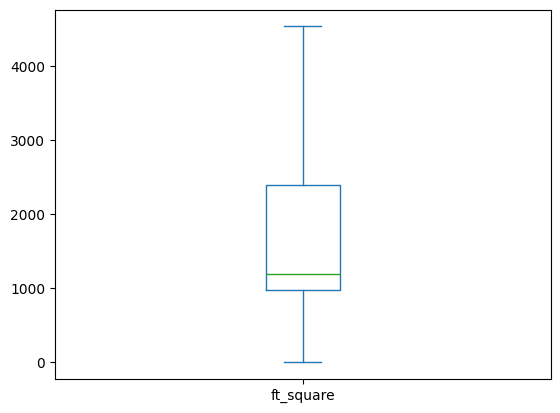

In [187]:
outlier_treatment(result['ft_square']).plot(kind = 'box')

In [209]:
result.columns

Index(['price', 'city', 'Type', 'Bed Room', 'Bath Room', 'Floor', 'ft_square'], dtype='object')

In [227]:
result['price'].describe()

count     2183.000000
mean     11386.992213
std      11758.989702
min          8.000000
25%       2650.000000
50%       6000.000000
75%      16000.000000
max      36025.000000
Name: price, dtype: float64

In [216]:
dct = {'Train':[{'Column':{'price':[{'count':4 , 'mean':34.4,"median":4.2}],'Bed Room':[1,2,3,4],"Bath Room":[1,2,3,4,5]}}]}

In [299]:
with open('example.yaml','w') as file:
    yaml.safe_dump(final , file)

In [218]:
result['price'].dtype

dtype('float64')

In [225]:
price_dict = dict(zip(result['price'].describe().index,result['price'].describe()))

In [224]:
dict(zip(result['Type'].value_counts().index , result['Type'].value_counts()))

{'Apartment': 764, 'House': 731, 'Condo': 688}

In [278]:
column = {}
for i in result.columns:
    if result[i].dtype == 'O' or len(list(result[i].unique()))<=20:
        ind = result[i].value_counts().index
        val = list(result[i].value_counts())
        temp_dict = dict(zip(ind,list(val)))
        column[i]=(temp_dict)
    else:
        ind = result[i].describe().index
        val = list(result[i].describe())
        temp_dict = dict(zip(ind,list(val)))
        column[i]=(temp_dict)

final_column = {'Detail':[{"Train":[{'Columns':[column]}],'Test':[{'Columns':[column]}]}]}

In [287]:
from sklearn.model_selection import train_test_split

In [288]:
train , test = train_test_split(result , test_size = 0.2)

In [300]:
def detail_for_yaml(train , test):
    final = {}
    df = {'Train':train , "Test":test}
    for text , data in list(zip(list(df.keys()) , list(df.values()))):
        column = {}
        for i in data.columns:
            if data[i].dtype == 'O' or len(list(data[i].unique()))<=20:
                ind = data[i].value_counts().index
                val = list(data[i].value_counts())
                temp_dict = dict(zip(ind,list(val)))
                column[i]=(temp_dict)
            else:
                ind = data[i].describe().index
                val = list(data[i].describe())
                temp_dict = dict(zip(ind,list(val)))
                column[i]=(temp_dict)
        final[text] = column
    return final

In [301]:
detail_for_yaml(train , test)

{'Train': {'price': {'count': 1746.0,
   'mean': 11561.220504009163,
   'std': 11877.676468052026,
   'min': 8.0,
   '25%': 2650.0,
   '50%': 6000.0,
   '75%': 16500.0,
   'max': 36025.0},
  'city': {'okkalappa south': 290,
   'thingangkuun': 199,
   'dagon myothit (north)': 181,
   'yankin': 151,
   'mayangone': 140,
   'hlaing': 113,
   'sanchaung': 101,
   'thaketa': 96,
   'tamwe': 85,
   'kamaryut': 60,
   'bahan': 53,
   'ahlon': 40,
   'dagon myothit (south)': 25,
   'thanlyin': 23,
   'dawbon': 22,
   'lanmadaw': 21,
   'mingalartaungnyunt': 17,
   'insein': 17,
   'kyeemyindaing': 16,
   'okkalappa north': 16,
   'botahtaung': 13,
   'hlaingtharya': 13,
   'dagon myothit (east)': 12,
   'pazundaung': 9,
   'dagon myothit (seikkan)': 8,
   'dagon': 7,
   'mingaladon': 7,
   'kyauktada': 6,
   'pabedan': 2,
   'shwepyithar': 1,
   'latha': 1,
   'palae myothit': 1},
  'Type': {'Apartment': 609, 'House': 602, 'Condo': 535},
  'Bed Room': {2.0: 615,
   3.0: 380,
   1.0: 285,
   4.

In [310]:
sorted(result['Floor'].value_counts().index)

[0.5,
 1.0,
 1.5,
 2.0,
 2.5,
 3.0,
 3.5,
 4.0,
 4.5,
 5.0,
 5.5,
 6.0,
 6.5,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 14.0,
 15.0,
 16.0,
 19.0,
 20.0,
 21.0,
 22.0,
 24.5,
 26.0,
 29.0,
 33.0]

<Axes: xlabel='Floor'>

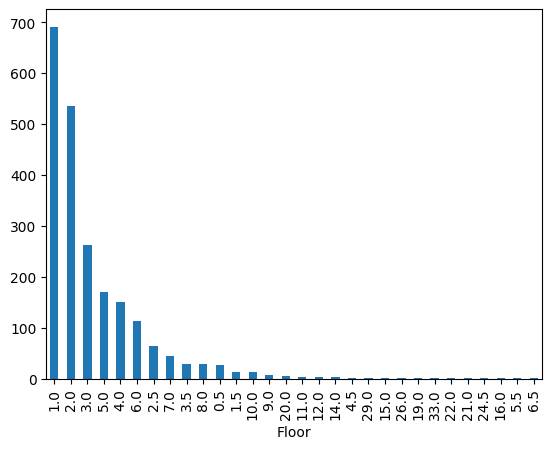

In [315]:
result['Floor'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Floor'>

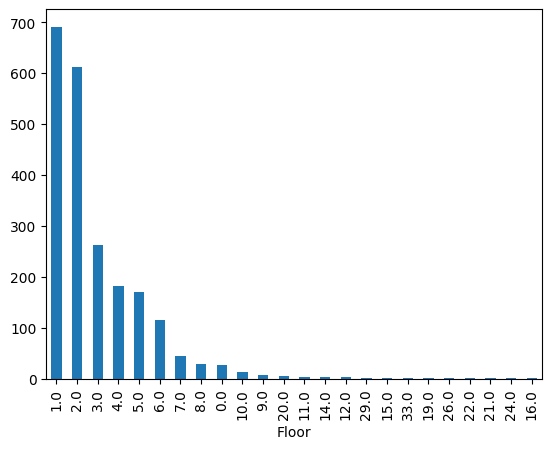

In [314]:
np.round(result['Floor'],0).value_counts().plot(kind = 'bar')

In [328]:
result['Floor'].apply(lambda x: x if x<6  else 7).unique()

array([3. , 2.5, 2. , 4. , 7. , 5. , 1. , 3.5, 1.5, 0.5, 5.5, 4.5])

In [321]:
result['Floor']

1        3.0
2        2.5
4        3.0
6        2.0
11       2.5
        ... 
10630    3.0
10631    3.0
10632    2.0
10634    3.5
10635    2.0
Name: Floor, Length: 2183, dtype: float64

In [329]:
result

,price,city,Type,Bed Room,Bath Room,Floor,ft_square
1,2990.0,okkalappa south,Apartment,2.0,1.0,3.0,972.0
2,11700.0,dagon myothit (north),House,4.0,4.0,2.5,1200.0
4,9800.0,dagon myothit (north),House,5.0,7.0,3.0,1320.0
6,36025.0,mayangone,House,5.0,3.0,2.0,4225.0
11,35000.0,yankin,House,3.0,3.0,2.5,2400.0
...,...,...,...,...,...,...,...
10630,12000.0,hlaing,House,5.0,3.0,3.0,1495.0
10631,36025.0,thingangkuun,House,7.0,7.0,3.0,6400.0
10632,32000.0,thingangkuun,House,7.0,4.0,2.0,6300.0
10634,36025.0,bahan,House,7.0,7.0,3.5,7925.0


In [334]:
np.array(result['price'])

array([ 2990., 11700.,  9800., ..., 32000., 36025., 30000.], shape=(2183,))

In [364]:
list(result['ft_square'].describe())

[2183.0,
 5031.479606046725,
 134313.73791836304,
 0.24,
 972.0,
 1200.0,
 2400.0,
 6265625.0]